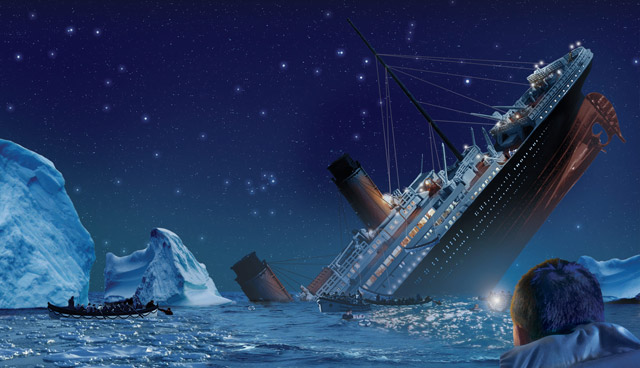

In [62]:
from IPython.display import Image
Image("Image/titanic-disaster.jpg")

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

import os
for dirname, _, filenames in os.walk('/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Import data

In [64]:
training = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
# training.head(10)

In [65]:

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN

all_data = pd.concat([training,test])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

Light data 

In [66]:
#summaries and count null
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [67]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [68]:
training.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [69]:
#seperate to two type column: numeric and categories
df_num = training[['Age','SibSp','Parch','Fare']]
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

# df_num.head(10)

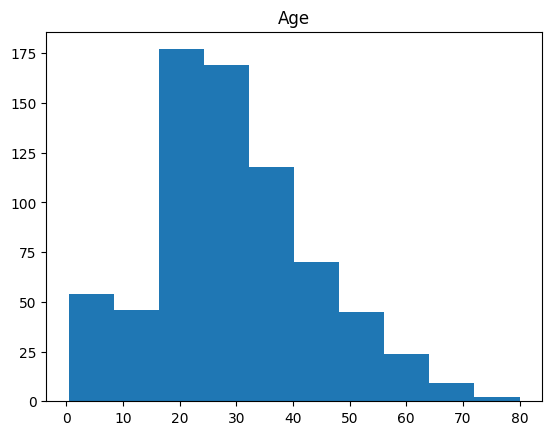

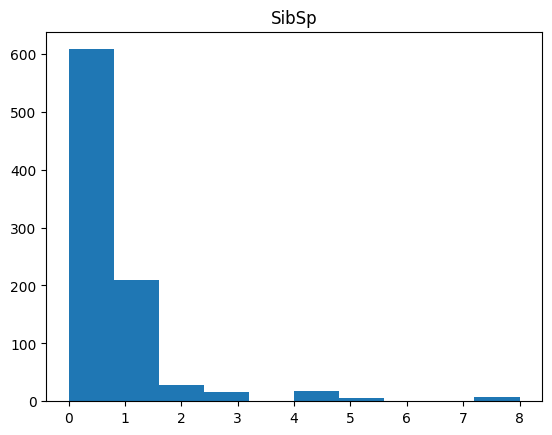

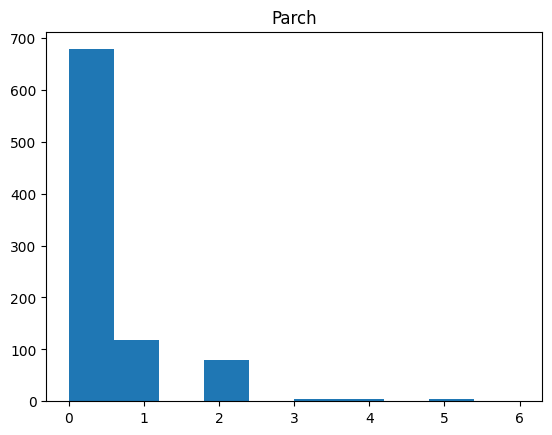

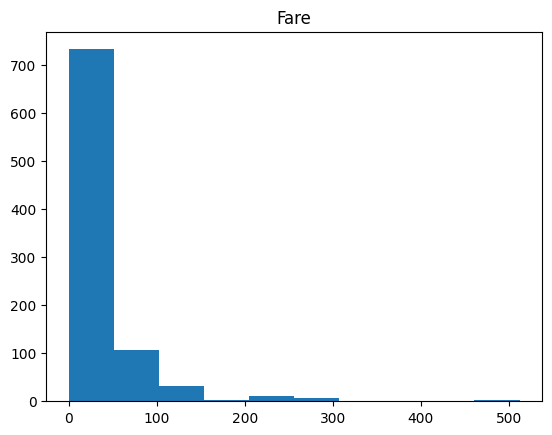

In [70]:
for i in df_num.columns:
    plt.hist(df_num[i],)
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

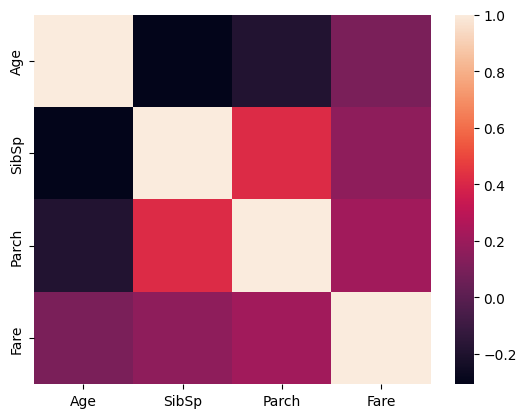

In [71]:
#corespond of feature
print(df_num.corr())
sns.heatmap(df_num.corr())

In [72]:
#compare survive
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


for category

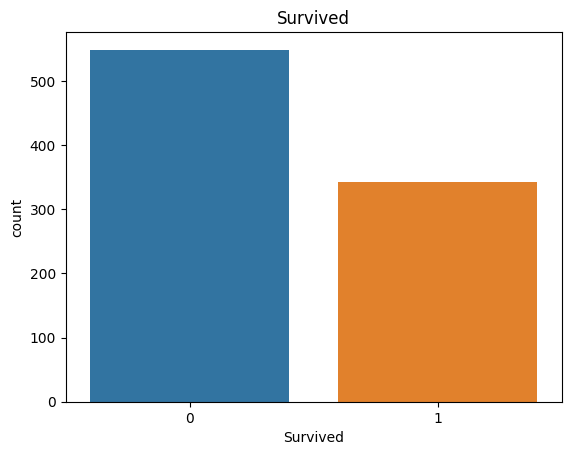

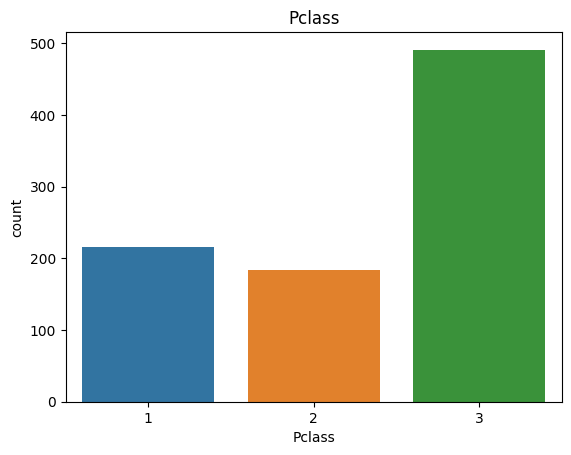

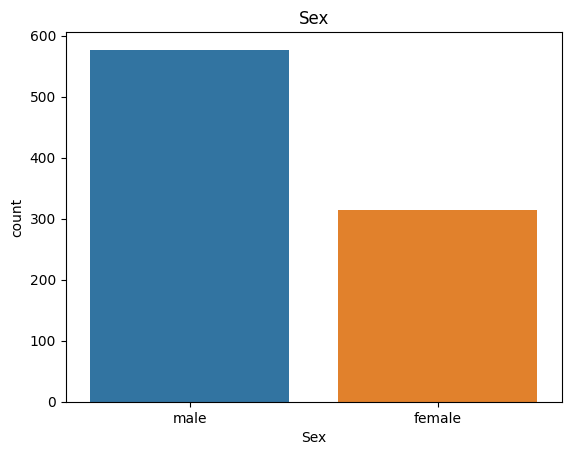

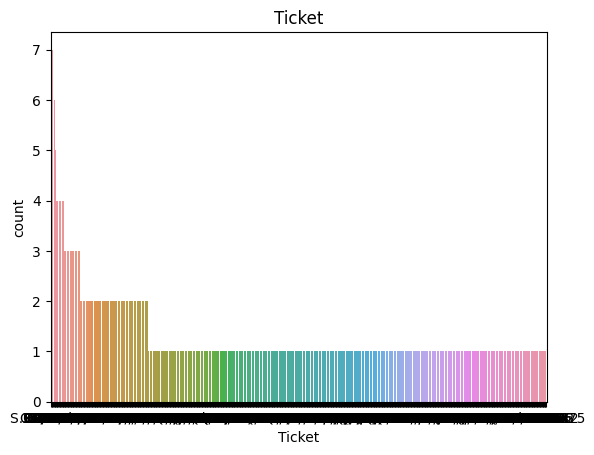

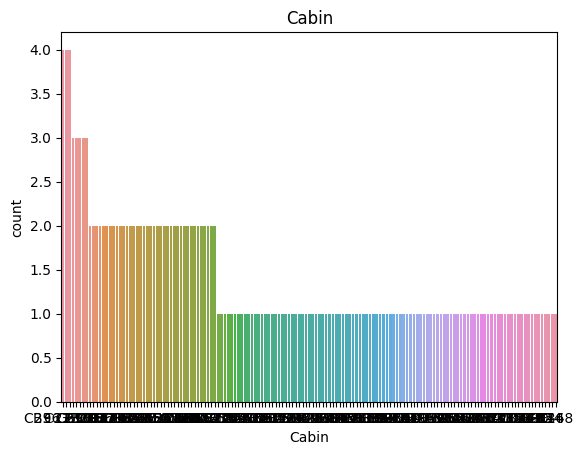

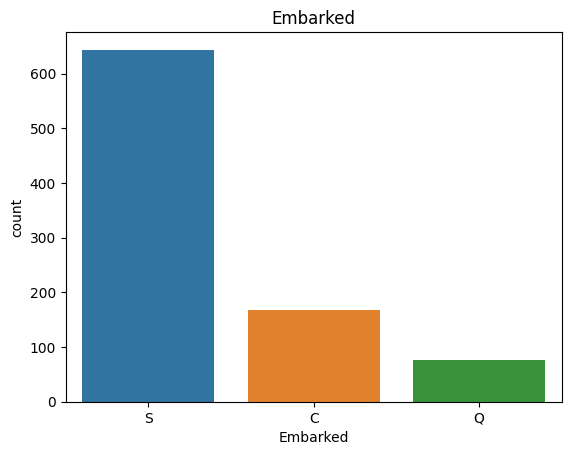

In [73]:
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts())
    plt.title(i)
    plt.show()

In [74]:
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Cabin' ,aggfunc ='count'))

#print number of survived pclass 1,2,3


Pclass      1   2  3
Survived            
0          59   3  6
1         117  13  6


In [75]:
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Fare' ,aggfunc ='count'))

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [76]:
#print number of male embarked C and survived
filtered_data = training[(training['Sex'] == 'female') & (training['Embarked'] == 'C') & (training['Survived'] == 1)]
filtered_data.shape[0]

64

Check number cabin each passenger use

In [77]:
cabin_filter = training[training['Cabin'].notnull()]
print(cabin_filter.shape[0])


training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
training['cabin_multiple'].value_counts()

204


cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

How these stas impact in survived

In [78]:
pd.pivot_table(training, index = 'Survived', columns = 'cabin_multiple', values = 'PassengerId' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [79]:
#assign the first letter of the cabin to the cabin_adv
training['cabin_adv'] = training['Cabin'].apply(lambda x: 'null' if pd.isna(x) else str(x)[0])

In [80]:
sorted_data = training.sort_values('PassengerId')
sorted_data.value_counts()

PassengerId  Survived  Pclass  Name                                                                                Sex     Age    SibSp  Parch  Ticket             Fare      Cabin            Embarked  train_test  cabin_multiple  cabin_adv
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)                                 female  38.00  1      0      PC 17599           71.2833   C85              C         1           1               C            1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)                                       female  53.00  2      0      11769              51.4792   C101             S         1           1               C            1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)                                           female  39.00  1      0      13507              55.9000   E44              S         1           1               E            1
582          1         1       Th

In [81]:
#check survival rate by cabin_adv
print('Check num passenger each cabin_adv:')
print(training.cabin_adv.value_counts())
print('\n Check the survival rate by cabin_adv:')
print(pd.pivot_table(training, index = 'Survived', columns = 'cabin_adv', values = 'Name' ,aggfunc ='count'))

Check num passenger each cabin_adv:
cabin_adv
null    687
C        59
B        47
D        33
E        32
A        15
F        13
G         4
T         1
Name: count, dtype: int64

 Check the survival rate by cabin_adv:
cabin_adv    A     B     C     D     E    F    G    T   null
Survived                                                    
0          8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0  481.0
1          7.0  35.0  35.0  25.0  24.0  8.0  2.0  NaN  206.0


=> in identified cabin, passengers is more survived.

Ticket processing


In [120]:
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() 
                                                if len(x.split(' ')[:-1]) >0 else 0)
# training['numeric_ticket'].value_counts()
# print(training['Ticket'].value_counts())
# training[['ticket_letters', 'Ticket']]

In [83]:
training['numeric_ticket'].value_counts()

numeric_ticket
1    661
0    230
Name: count, dtype: int64

In [84]:
pd.set_option('display.max_rows', None)
training['ticket_letters'].value_counts()

ticket_letters
0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: count, dtype: int64

In [85]:
pd.pivot_table(training,index='Survived',columns='numeric_ticket', values = 'PassengerId', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [86]:
pd.set_option('display.max_columns', None)
pd.pivot_table(training,index='Survived',columns='ticket_letters', values = 'PassengerId', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,pc,pp,ppp,sc,sca4,scah,scahbasle,scow,scparis,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,21.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,6.0,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,39.0,2.0,1.0,1.0,NaN,1.0,1.0,NaN,5.0,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


Name processing

In [87]:
training.Name.head(50)
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
training[['Name', 'name_title']].head(10)
training['name_title'].value_counts()

name_title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

Data processing for model 

Create all added variable in train and test 

In [88]:
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
all_data.columns.to_list()
# all_data.Survived.value_counts()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'train_test',
 'cabin_multiple',
 'cabin_adv',
 'numeric_ticket',
 'ticket_letters',
 'name_title']

Drop null value from Embarked

In [89]:
all_data.dropna(subset=['Embarked'],inplace = True)

Normalize   

In [90]:
training.Age.median()
training["Age"].isnull().value_counts()

Age
False    714
True     177
Name: count, dtype: int64

In [91]:
all_data.Age = all_data.Age.fillna(training.Age.median())
all_data['Age'].value_counts()

Age
28.00    295
24.00     47
22.00     43
21.00     41
30.00     40
18.00     39
25.00     34
36.00     31
26.00     30
29.00     30
27.00     30
19.00     29
23.00     26
32.00     24
35.00     23
20.00     23
31.00     23
33.00     21
45.00     21
39.00     20
17.00     20
16.00     19
42.00     18
40.00     18
34.00     16
50.00     15
47.00     14
48.00     14
38.00     13
2.00      12
41.00     11
44.00     10
4.00      10
9.00      10
1.00      10
54.00     10
43.00      9
37.00      9
49.00      9
51.00      8
14.00      8
55.00      8
60.00      7
3.00       7
58.00      6
46.00      6
15.00      6
8.00       6
6.00       6
52.00      6
64.00      5
57.00      5
13.00      5
5.00       5
61.00      5
53.00      4
62.00      4
63.00      4
10.00      4
32.50      4
56.00      4
7.00       4
11.00      4
59.00      3
18.50      3
40.50      3
65.00      3
0.75       3
28.50      3
0.83       3
12.00      3
14.50      2
36.50      2
45.50      2
30.50      2
70.00      2
71.00   

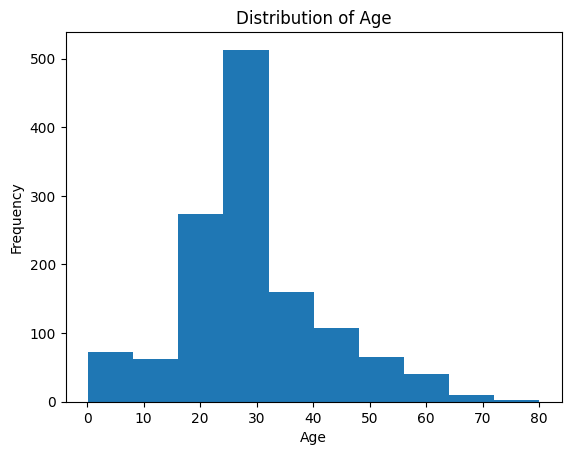

In [92]:
plt.hist(all_data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [93]:
all_data.Fare = all_data.Fare.fillna(training.Fare.median())
training.Fare.median()

14.4542

Norm sibling

norm_sibsp  SibSp
0.000000    0        889
0.693147    1        319
1.098612    2         42
1.609438    4         22
1.386294    3         20
2.197225    8          9
1.791759    5          6
Name: count, dtype: int64

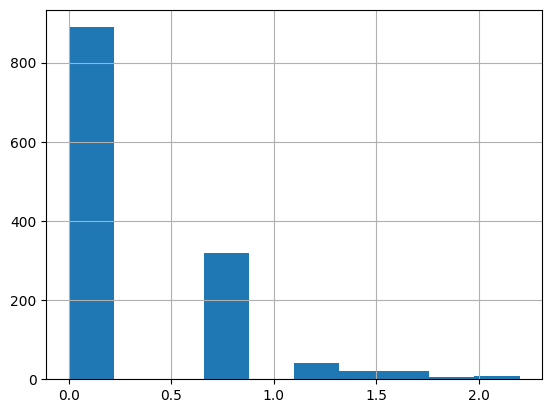

In [94]:
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()
all_data[['norm_sibsp','SibSp']].value_counts()


Norm fare

<Axes: >

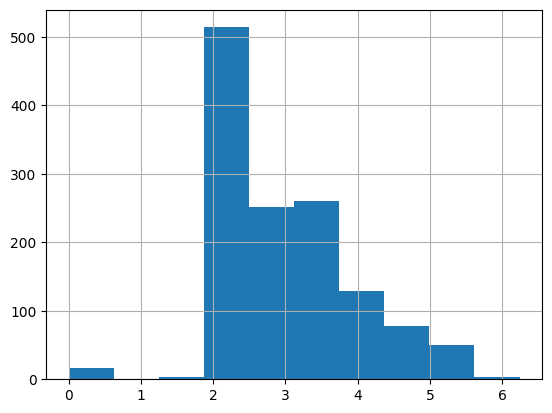

In [95]:
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

In [96]:
all_data.Pclass = all_data.Pclass.astype(str)
all_data.Pclass.value_counts()

Pclass
3    709
1    321
2    277
Name: count, dtype: int64

Create data frame of all column related to surviving

In [97]:
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch',
                                       'norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])
all_dummies.head(5)
# all_data.head(10)

,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,train_test,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,cabin_adv_A,cabin_adv_B,cabin_adv_C,cabin_adv_D,cabin_adv_E,cabin_adv_F,cabin_adv_G,cabin_adv_T,cabin_adv_n,name_title_Capt,name_title_Col,name_title_Don,name_title_Dona,name_title_Dr,name_title_Jonkheer,name_title_Lady,name_title_Major,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,22.0,1,0,2.110213,0,0,1,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,38.0,1,0,4.280593,1,0,1,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,26.0,0,0,2.188856,0,0,1,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,35.0,1,0,3.990834,1,1,1,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,35.0,0,0,2.202765,0,1,1,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


Create train and test data in all_dummies

In [98]:
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived
y_train.shape

(889,)

Scale numeric columns

In [99]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled.head(5)

,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,train_test,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,cabin_adv_A,cabin_adv_B,cabin_adv_C,cabin_adv_D,cabin_adv_E,cabin_adv_F,cabin_adv_G,cabin_adv_T,cabin_adv_n,name_title_Capt,name_title_Col,name_title_Don,name_title_Dona,name_title_Dr,name_title_Jonkheer,name_title_Lady,name_title_Major,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,-0.580261,0.480272,-0.445407,-0.896331,0,0,1,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,0.662297,0.480272,-0.445407,1.347870,1,0,1,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,-0.269621,-0.479537,-0.445407,-0.815013,0,0,1,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,0.429318,0.480272,-0.445407,1.048255,1,1,1,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,0.429318,-0.479537,-0.445407,-0.800632,0,1,1,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [100]:
X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived


Model training

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Naive Bayes

In [102]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


In [103]:
#test naive bayes with X_test_scaled
gnb.fit(X_train_scaled,y_train)
result = gnb.predict(X_test_scaled)
result = result.astype(int)

basic_submission = {'PassengerId': test.PassengerId, 'Survived': result}
base_submission = pd.DataFrame(data=basic_submission)
submission_df = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': result})

In [104]:
import os 
if not os.path.exists('result'):
    os.makedirs('result')
    
if not os.path.exists("result/naive_bayes"):
    os.makedirs("result/naive_bayes")
    
submission_df.to_csv("result/naive_bayes/submission.csv", index=False)

K nearest neighbor

In [105]:
X_train.head(5)

,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,cabin_adv_A,cabin_adv_B,cabin_adv_C,cabin_adv_D,cabin_adv_E,cabin_adv_F,cabin_adv_G,cabin_adv_T,cabin_adv_n,name_title_Capt,name_title_Col,name_title_Don,name_title_Dona,name_title_Dr,name_title_Jonkheer,name_title_Lady,name_title_Major,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,22.0,1,0,2.110213,0,0,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,38.0,1,0,4.280593,1,0,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,26.0,0,0,2.188856,0,0,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,35.0,1,0,3.990834,1,1,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,35.0,0,0,2.202765,0,1,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [106]:
knn = KNeighborsClassifier(n_neighbors=10)
cv_knn = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print(cv_knn)
print(cv_knn.mean())    



[0.85955056 0.8258427  0.8258427  0.81460674 0.85310734]
0.8357900082523964


Others algorithms 

In [107]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [108]:
rf = RandomForestClassifier(random_state=1)
svc = SVC(probability=True)
lr = LogisticRegression(max_iter = 2000)

rf.fit(X_train_scaled, y_train)
svc.fit(X_train_scaled, y_train)
lr.fit(X_train_scaled, y_train)


from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1)

Voting classifier

In [109]:
from sklearn.ensemble import VotingClassifier
vote = VotingClassifier(estimators = [('rf',rf),('svc',svc),('xgb',xgb), ('gnb', gnb), ('knn', knn), ('lr', lr)], voting = 'soft')

vote.fit(X_train_scaled, y_train)

test_result_voting = vote.predict(X_test_scaled)
sb = {'PassengerId': test.PassengerId, 'Survived': test_result_voting}
submission_voting = pd.DataFrame(data=sb).astype(int)
submission_voting.to_csv('result/voting_submission.csv', index =False)

Use deep learning

In [110]:
X_train_scaled.head(5)

,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,cabin_adv_A,cabin_adv_B,cabin_adv_C,cabin_adv_D,cabin_adv_E,cabin_adv_F,cabin_adv_G,cabin_adv_T,cabin_adv_n,name_title_Capt,name_title_Col,name_title_Don,name_title_Dona,name_title_Dr,name_title_Jonkheer,name_title_Lady,name_title_Major,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,-0.580261,0.480272,-0.445407,-0.896331,0,0,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,0.662297,0.480272,-0.445407,1.347870,1,0,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,-0.269621,-0.479537,-0.445407,-0.815013,0,0,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,0.429318,0.480272,-0.445407,1.048255,1,1,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,0.429318,-0.479537,-0.445407,-0.800632,0,1,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [111]:
X_train_dl = X_train_scaled.copy()
X_test_dl = X_test_scaled.copy()

#chuyen false true tp 0 1
X_train_dl = X_train_dl.replace({False: 0, True: 1})
X_test_dl = X_train_dl.replace({False: 0, True: 1})

X_train_dl.head(5)
X_train_dl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      889 non-null    float64
 1   SibSp                    889 non-null    float64
 2   Parch                    889 non-null    float64
 3   norm_fare                889 non-null    float64
 4   cabin_multiple           889 non-null    int64  
 5   numeric_ticket           889 non-null    int64  
 6   Pclass_1                 889 non-null    int64  
 7   Pclass_2                 889 non-null    int64  
 8   Pclass_3                 889 non-null    int64  
 9   Sex_female               889 non-null    int64  
 10  Sex_male                 889 non-null    int64  
 11  Embarked_C               889 non-null    int64  
 12  Embarked_Q               889 non-null    int64  
 13  Embarked_S               889 non-null    int64  
 14  cabin_adv_A              889 no

In [112]:
import torch
from torchvision import datasets, transforms
import torch.utils.data as data
from torch.autograd import Variable
from torch import nn
from torch import optim



Tranfer dataframe to tensor

In [140]:
class set_up_data(data.Dataset):
    def __init__(self, file):
        data_matrix = file.values
        self.data = torch.from_numpy(data_matrix)
        self.data = self.data.float()
        target = y_train.values
        self.target = torch.from_numpy(target)
        
        print(self.data.shape)
        print(self.target.shape)
        self.n_samples = data_matrix.shape[0]
    
    def __len__(self):
        return self.n_samples
    def __getitem__(self, index):
        return self.data[index], self.target[index]
    

In [114]:
#test, not use
# data_matrix = X_train_dl.values
# data_matrix = torch.from_numpy(data_matrix)
# target = y_train.values
# target = torch.from_numpy(target).float()

# data_matrix.shape[0]  # len of data

Make dataloader

In [187]:
train_data = set_up_data(X_train_dl)
len(train_data)
train_dataloader = data.DataLoader(dataset=train_data, batch_size=64, num_workers=0)

train_data[0]
    

torch.Size([889, 41])
torch.Size([889])


(tensor([-0.5803,  0.4803, -0.4454, -0.8963,  0.0000,  0.0000,  0.0000,  0.0000,
          1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000]),
 tensor(0., dtype=torch.float64))

In [116]:
# %pdb


MODEL

In [188]:
class my_model(nn.Module):
    def __init__(self, input = 41, output = 1):
        super(my_model, self).__init__()
        self.input = input
        self.output = output
        
        self.tuan = nn.Sequential(
                        nn.Linear(self.input, 16),
                        nn.ReLU(),
                        nn.Linear(16, 8),
                        nn.ReLU(),
                        nn.Linear(8, 4),
                        nn.ReLU(),
                        nn.Linear(4, self.output),
                        nn.Sigmoid(),
                    )
    def forward(self, x):
        x = self.tuan(x)
        return x
    

Define full model 

In [189]:
model = my_model()
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

Traninning

In [190]:
loss_data=[]
epochs = 2000
for e in range(epochs):
    running_loss = 0
    for  batch, (X, Y) in enumerate (train_dataloader):
        Y = Y.view(-1,1).float()
        optimizer.zero_grad()
        output = model(X).float()
        loss = loss_fn(output, Y)
        
        running_loss += loss.item()
        
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    loss_data.append(loss.item())
    print(f"Epoch: {e}, Loss: {loss.item()}")

Epoch: 0, Loss: 0.7063674926757812
Epoch: 1, Loss: 0.6748697757720947
Epoch: 2, Loss: 0.6574623584747314
Epoch: 3, Loss: 0.6487253904342651
Epoch: 4, Loss: 0.641211211681366
Epoch: 5, Loss: 0.6314602494239807
Epoch: 6, Loss: 0.6170074939727783
Epoch: 7, Loss: 0.5957940220832825
Epoch: 8, Loss: 0.5668329000473022
Epoch: 9, Loss: 0.5315882563591003
Epoch: 10, Loss: 0.49434441328048706
Epoch: 11, Loss: 0.4597664773464203
Epoch: 12, Loss: 0.4248378574848175
Epoch: 13, Loss: 0.39442071318626404
Epoch: 14, Loss: 0.3720502257347107
Epoch: 15, Loss: 0.35464784502983093
Epoch: 16, Loss: 0.34096768498420715
Epoch: 17, Loss: 0.33051303029060364
Epoch: 18, Loss: 0.323749840259552
Epoch: 19, Loss: 0.3184801936149597
Epoch: 20, Loss: 0.31441378593444824
Epoch: 21, Loss: 0.31102919578552246
Epoch: 22, Loss: 0.30892419815063477
Epoch: 23, Loss: 0.3069586753845215
Epoch: 24, Loss: 0.30549296736717224
Epoch: 25, Loss: 0.3038163185119629
Epoch: 26, Loss: 0.3017438054084778
Epoch: 27, Loss: 0.299901723861

Visualize loss 

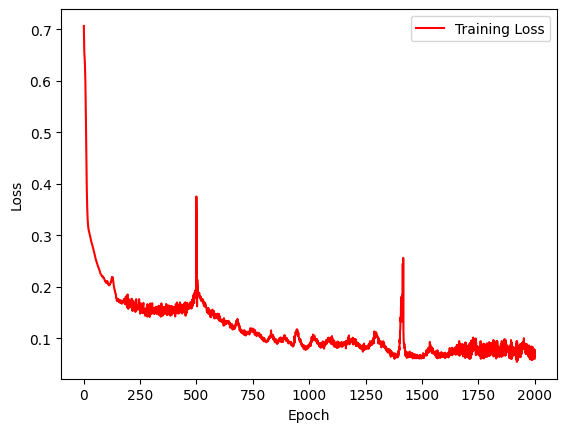

Training loss: 0.31395010171192034


In [191]:
epoch_count = range(1, epochs + 1)

plt.plot(epoch_count, loss_data, 'r')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

print(f"Training loss: {running_loss/len(train_dataloader)}") 

In [175]:
X_test_dl = X_test_dl.replace({False: 0, True: 1})
X_test_dl.head(5)

,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,cabin_adv_A,cabin_adv_B,cabin_adv_C,cabin_adv_D,cabin_adv_E,cabin_adv_F,cabin_adv_G,cabin_adv_T,cabin_adv_n,name_title_Capt,name_title_Col,name_title_Don,name_title_Dona,name_title_Dr,name_title_Jonkheer,name_title_Lady,name_title_Major,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,-0.580261,0.480272,-0.445407,-0.896331,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.662297,0.480272,-0.445407,1.347870,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,-0.269621,-0.479537,-0.445407,-0.815013,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.429318,0.480272,-0.445407,1.048255,1,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.429318,-0.479537,-0.445407,-0.800632,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [192]:


class set_up_test_data(data.Dataset):
    def __init__(self, file):
        data_matrix = file.values
        self.data = torch.from_numpy(data_matrix)
        self.data = self.data.float()
        
        test_id = test.PassengerId.values
        self.passid = torch.from_numpy(test_id)
        
        self.n_samples = data_matrix.shape[0]
    
    def __len__(self):
        return self.n_samples
    def __getitem__(self, index):
        return self.data[index], self.passid[index]

In [193]:
test_data = set_up_test_data(X_test_dl)
# test_dataloader = data.DataLoader(dataset=test_data, batch_size=64, num_workers=0)

In [208]:
predictions = []
for X,Y in test_data:
    with torch.no_grad():
        output = model(X)
        output = output.numpy()
        if output > 0.5:
            predictions.append(1)
        else:
            predictions.append(0)

submission = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
base_submission = pd.DataFrame(data=submission)
submission.to_csv('result/deep_learning_submission.csv', index =False)